In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
df=pd.read_csv('/content/drive/MyDrive/datasets/lending_club_loan_two.csv')
data_info=pd.read_csv('/content/drive/MyDrive/datasets/lending_club_info.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99297 entries, 0 to 99296
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             99297 non-null  float64
 1   term                  99297 non-null  object 
 2   int_rate              99297 non-null  float64
 3   installment           99297 non-null  float64
 4   grade                 99297 non-null  object 
 5   sub_grade             99297 non-null  object 
 6   emp_title             93628 non-null  object 
 7   emp_length            94747 non-null  object 
 8   home_ownership        99297 non-null  object 
 9   annual_inc            99297 non-null  float64
 10  verification_status   99297 non-null  object 
 11  issue_d               99297 non-null  object 
 12  loan_status           99297 non-null  object 
 13  purpose               99297 non-null  object 
 14  title                 98859 non-null  object 
 15  dti                

In [96]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,99297.0,14124.348671,8379.122365,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,99297.0,13.641082,4.461743,5.32,10.49,13.33,16.49,30.99
installment,99297.0,432.131675,251.519946,16.25,250.33,375.38,568.74,1533.81
annual_inc,99297.0,74260.423320,53861.787927,2500.00,45000.00,64000.00,90000.00,6100000.00
dti,99296.0,17.320533,8.134266,0.00,11.27,16.86,22.92,189.90
open_acc,99296.0,11.309187,5.125180,0.00,8.00,10.00,14.00,58.00
pub_rec,99296.0,0.178174,0.508706,0.00,0.00,0.00,0.00,19.00
revol_bal,99296.0,15817.260494,19604.482824,0.00,6061.00,11188.00,19641.00,1190046.00
revol_util,99224.0,53.764836,24.408182,0.00,35.80,54.80,72.80,152.50
total_acc,99296.0,25.442445,11.872300,2.00,17.00,24.00,32.00,135.00


In [97]:
df.corr()

<ipython-input-97-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.169419,0.954180,0.389299,0.037289,0.195841,-0.082996,0.339578,0.098589,0.222796,0.225434,-0.110680
int_rate,0.169419,1.000000,0.162466,-0.064739,0.177148,0.007809,0.064886,-0.011764,0.296795,-0.037619,-0.084509,0.057493
installment,0.954180,0.162466,1.000000,0.384224,0.034459,0.186445,-0.072048,0.329062,0.122767,0.201691,0.196889,-0.102348
annual_inc,0.389299,-0.064739,0.384224,1.000000,-0.199580,0.151208,-0.012652,0.331121,0.033343,0.216737,0.268550,-0.057848
dti,0.037289,0.177148,0.034459,-0.199580,1.000000,0.300139,-0.039626,0.149016,0.194085,0.226449,-0.053572,-0.028646
open_acc,0.195841,0.007809,0.186445,0.151208,0.300139,1.000000,-0.019349,0.230909,-0.132670,0.678621,0.115060,-0.028520
pub_rec,-0.082996,0.064886,-0.072048,-0.012652,-0.039626,-0.019349,1.000000,-0.111572,-0.078959,0.018757,0.013699,0.732489
revol_bal,0.339578,-0.011764,0.329062,0.331121,0.149016,0.230909,-0.111572,1.000000,0.238539,0.200207,0.203162,-0.130136
revol_util,0.098589,0.296795,0.122767,0.033343,0.194085,-0.132670,-0.078959,0.238539,1.000000,-0.102069,0.010980,-0.086642
total_acc,0.222796,-0.037619,0.201691,0.216737,0.226449,0.678621,0.018757,0.200207,-0.102069,1.000000,0.383509,0.040220


<Axes: xlabel='loan_status', ylabel='count'>

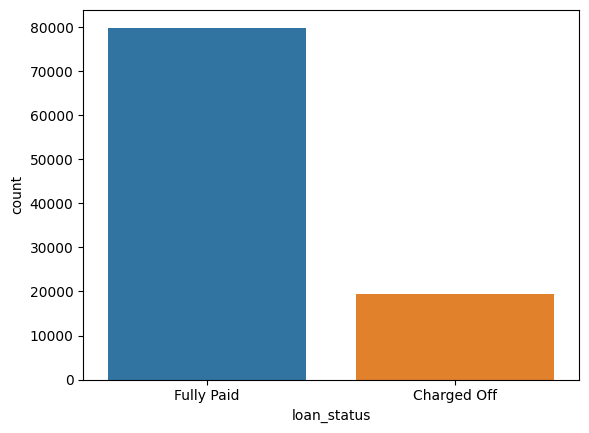

In [98]:
sns.countplot(x='loan_status',data=df)

<ipython-input-99-ef263c1d5af9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amnt'],kde=False)


<Axes: xlabel='loan_amnt'>

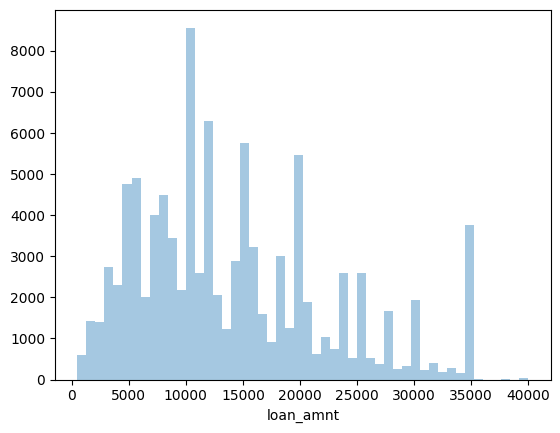

In [99]:
sns.distplot(df['loan_amnt'],kde=False)

<ipython-input-100-3668d996e46e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amnt'],kde=False,bins=40)


<Axes: xlabel='loan_amnt'>

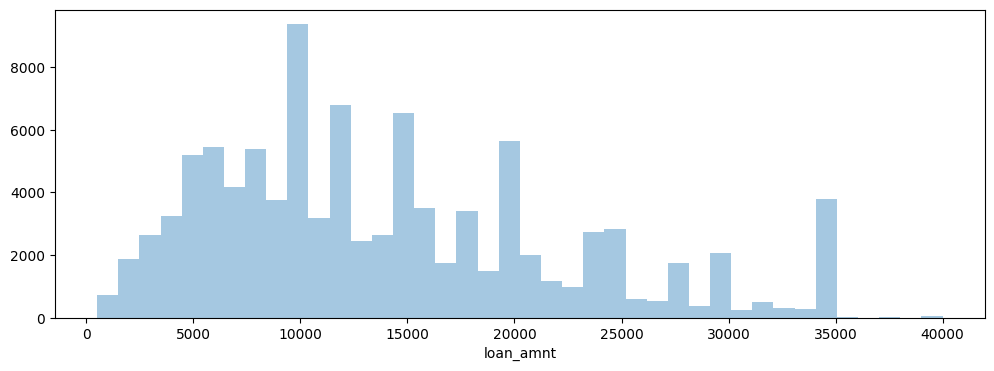

In [100]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False,bins=40)

In [101]:
df.corr()

<ipython-input-101-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.169419,0.954180,0.389299,0.037289,0.195841,-0.082996,0.339578,0.098589,0.222796,0.225434,-0.110680
int_rate,0.169419,1.000000,0.162466,-0.064739,0.177148,0.007809,0.064886,-0.011764,0.296795,-0.037619,-0.084509,0.057493
installment,0.954180,0.162466,1.000000,0.384224,0.034459,0.186445,-0.072048,0.329062,0.122767,0.201691,0.196889,-0.102348
annual_inc,0.389299,-0.064739,0.384224,1.000000,-0.199580,0.151208,-0.012652,0.331121,0.033343,0.216737,0.268550,-0.057848
dti,0.037289,0.177148,0.034459,-0.199580,1.000000,0.300139,-0.039626,0.149016,0.194085,0.226449,-0.053572,-0.028646
open_acc,0.195841,0.007809,0.186445,0.151208,0.300139,1.000000,-0.019349,0.230909,-0.132670,0.678621,0.115060,-0.028520
pub_rec,-0.082996,0.064886,-0.072048,-0.012652,-0.039626,-0.019349,1.000000,-0.111572,-0.078959,0.018757,0.013699,0.732489
revol_bal,0.339578,-0.011764,0.329062,0.331121,0.149016,0.230909,-0.111572,1.000000,0.238539,0.200207,0.203162,-0.130136
revol_util,0.098589,0.296795,0.122767,0.033343,0.194085,-0.132670,-0.078959,0.238539,1.000000,-0.102069,0.010980,-0.086642
total_acc,0.222796,-0.037619,0.201691,0.216737,0.226449,0.678621,0.018757,0.200207,-0.102069,1.000000,0.383509,0.040220


<ipython-input-102-6812646cd074>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

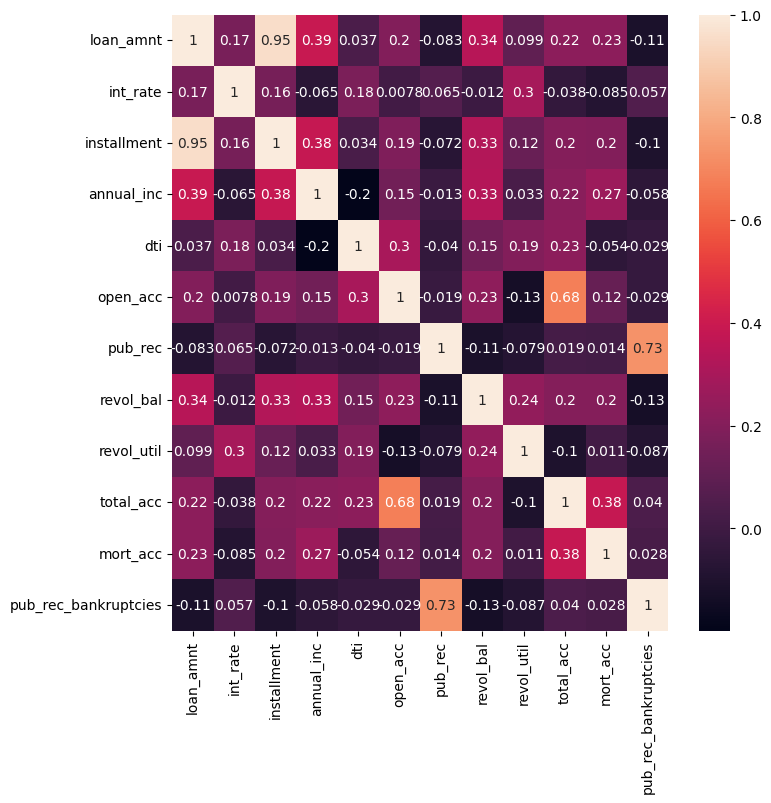

In [102]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='installment', ylabel='loan_amnt'>

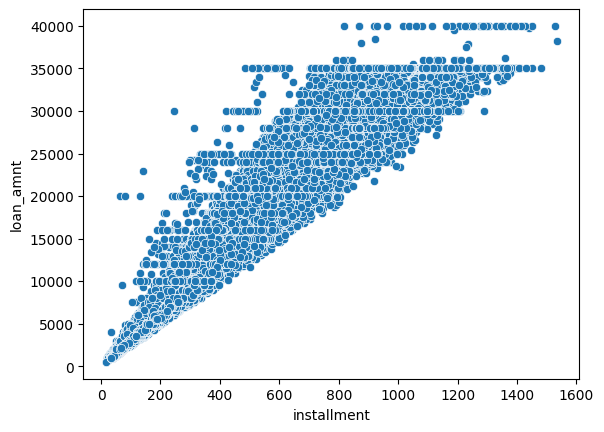

In [103]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

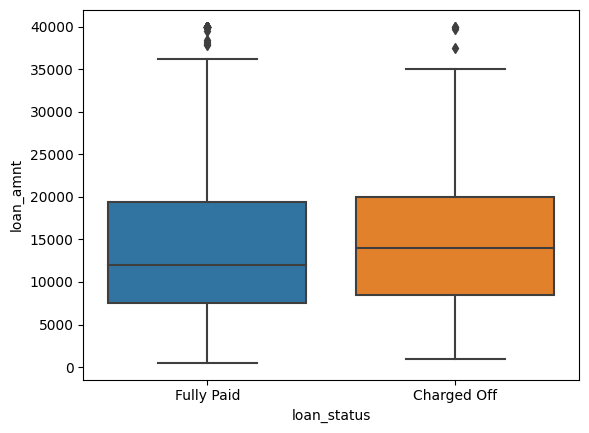

In [104]:
sns.boxplot(x='loan_status',y='loan_amnt', data=df)

In [105]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,19415.0,15119.452743,8510.335166,1000.0,8500.0,14000.0,20000.0,40000.0
Fully Paid,79882.0,13882.492614,8329.033804,500.0,7500.0,12000.0,19425.0,40000.0


In [106]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [107]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<Axes: xlabel='grade', ylabel='count'>

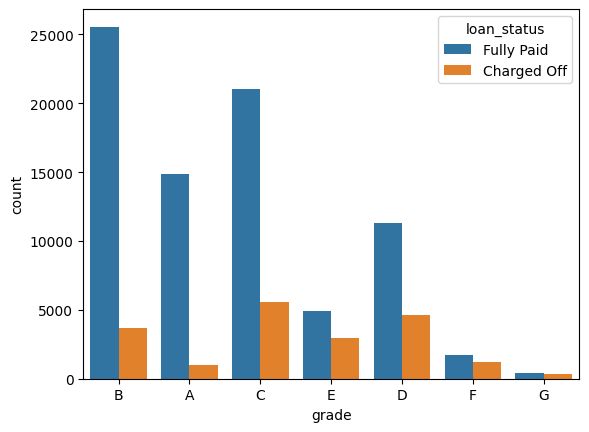

In [108]:
sns.countplot(x='grade',data=df,hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

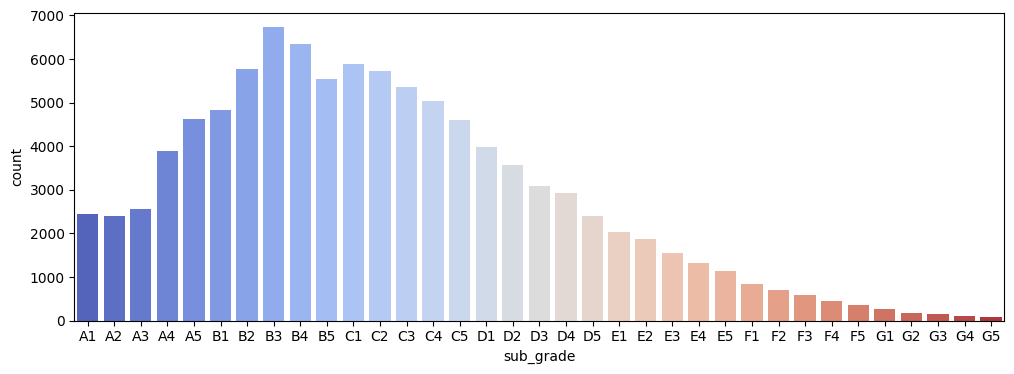

In [109]:
plt.figure(figsize=(12,4))
subgrade_order=sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='coolwarm')

<Axes: xlabel='sub_grade', ylabel='count'>

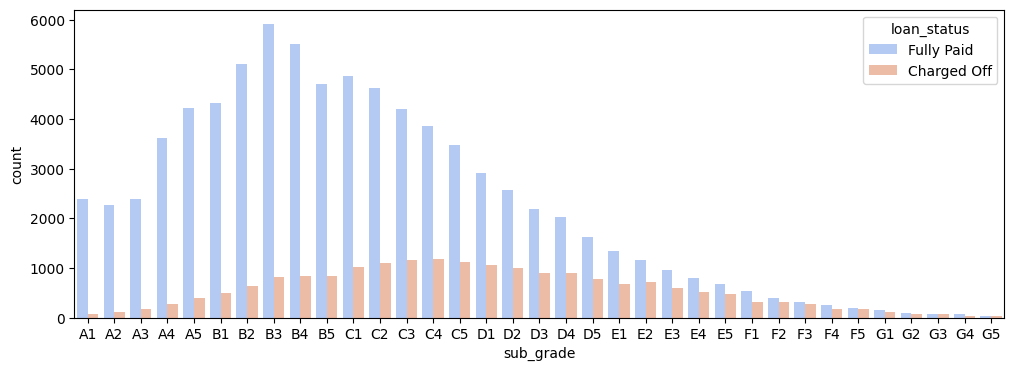

In [110]:
plt.figure(figsize=(12,4))
subgrade_order=sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='coolwarm',hue='loan_status')

<Axes: xlabel='sub_grade', ylabel='count'>

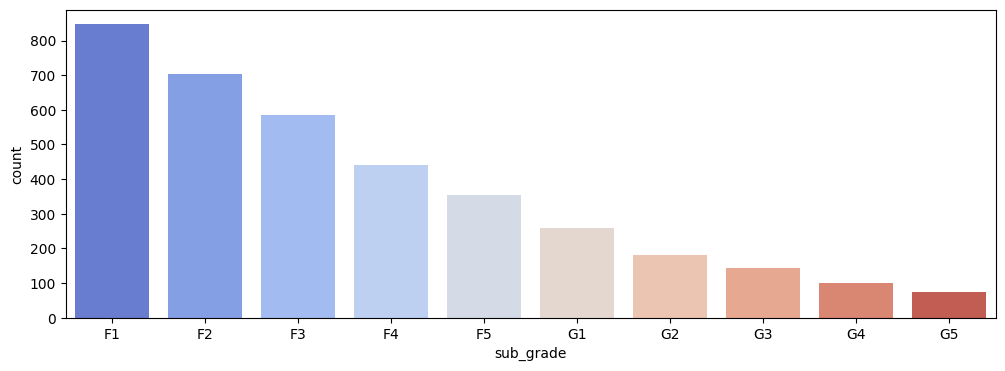

In [111]:
f_and_g=df[(df['grade']=='F')|(df['grade']=='G')]

plt.figure(figsize=(12,4))
subgrade_order=sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='coolwarm')

In [112]:
df['loan_repaid']=df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [113]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
99292,1,Fully Paid
99293,1,Fully Paid
99294,1,Fully Paid
99295,1,Fully Paid


<ipython-input-114-84269d723ac1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')


<Axes: >

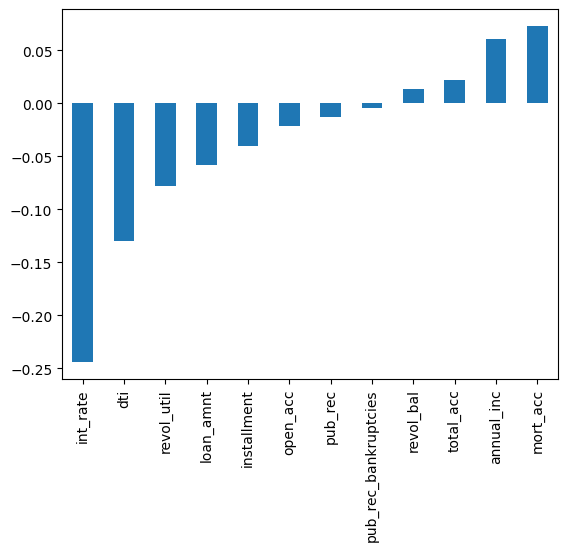

In [114]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

In [115]:
len(df)

99297

In [116]:
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               5669
emp_length              4550
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                    438
dti                        1
earliest_cr_line           1
open_acc                   1
pub_rec                    1
revol_bal                  1
revol_util                73
total_acc                  1
initial_list_status        1
application_type           1
mort_acc                9407
pub_rec_bankruptcies     123
address                    1
loan_repaid                0
dtype: int64

In [117]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.709135
emp_length              4.582213
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.441101
dti                     0.001007
earliest_cr_line        0.001007
open_acc                0.001007
pub_rec                 0.001007
revol_bal               0.001007
revol_util              0.073517
total_acc               0.001007
initial_list_status     0.001007
application_type        0.001007
mort_acc                9.473599
pub_rec_bankruptcies    0.123871
address                 0.001007
loan_repaid             0.000000
dtype: float64

In [118]:
df=df.drop('emp_title',axis=1)

In [119]:
df=df.drop('emp_length',axis=1)

In [120]:
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                    438
dti                        1
earliest_cr_line           1
open_acc                   1
pub_rec                    1
revol_bal                  1
revol_util                73
total_acc                  1
initial_list_status        1
application_type           1
mort_acc                9407
pub_rec_bankruptcies     123
address                    1
loan_repaid                0
dtype: int64

In [121]:
df=df.drop('title',axis=1)

In [122]:
df.corr()['mort_acc'].sort_values()

<ipython-input-122-08a22ffe92b2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['mort_acc'].sort_values()


int_rate               -0.084509
dti                    -0.053572
revol_util              0.010980
pub_rec                 0.013699
pub_rec_bankruptcies    0.028347
loan_repaid             0.073041
open_acc                0.115060
installment             0.196889
revol_bal               0.203162
loan_amnt               0.225434
annual_inc              0.268550
total_acc               0.383509
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [123]:
total_acc_avg=df.groupby('total_acc').mean()['mort_acc']

<ipython-input-123-daaebfbb97e6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_acc_avg=df.groupby('total_acc').mean()['mort_acc']


In [124]:
def fill_mort_acc(total_acc,mort_acc):
  if np.isnan(mort_acc):
    return total_acc_avg[total_acc]
  else:
    return mort_acc

In [125]:
df['total_acc']

0        25.0
1        27.0
2        26.0
3        13.0
4        43.0
         ... 
99292    39.0
99293    10.0
99294    34.0
99295    26.0
99296     NaN
Name: total_acc, Length: 99297, dtype: float64

In [126]:
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
dti                        1
earliest_cr_line           1
open_acc                   1
pub_rec                    1
revol_bal                  1
revol_util                73
total_acc                  1
initial_list_status        1
application_type           1
mort_acc                9407
pub_rec_bankruptcies     123
address                    1
loan_repaid                0
dtype: int64

In [127]:
df=df.dropna()

In [128]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [129]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99290,10000.0,36 months,19.72,370.22,D,D5,RENT,42000.0,Not Verified,Oct-2012,...,0.0,10498.0,97.2,8.0,f,INDIVIDUAL,0.0,0.0,"981 Hayes Junctions Apt. 589\r\nLake Donna, AR...",1
99292,5000.0,36 months,7.62,155.81,A,A3,MORTGAGE,75000.0,Source Verified,Dec-2013,...,0.0,18389.0,9.3,39.0,f,INDIVIDUAL,2.0,0.0,30777 Melissa Station Suite 209\r\nThomasborou...,1
99293,5000.0,36 months,10.49,162.49,B,B3,RENT,30000.0,Verified,Nov-2014,...,0.0,4982.0,25.2,10.0,f,INDIVIDUAL,0.0,0.0,"3024 Timothy Port Apt. 423\r\nWilliamburgh, SD...",1
99294,7600.0,36 months,13.98,259.68,C,C3,MORTGAGE,115000.0,Verified,Aug-2014,...,0.0,17785.0,46.3,34.0,w,INDIVIDUAL,1.0,0.0,"511 Tiffany Lane Suite 306\r\nNorth Thomas, NH...",1


In [130]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [131]:
df['term'].value_counts()

 36 months    68673
 60 months    21158
Name: term, dtype: int64

In [132]:
df['term']=df['term'].apply(lambda term: int(term[:3]))

In [133]:
df['term']

0        36
1        36
2        36
3        36
4        60
         ..
99290    36
99292    36
99293    36
99294    36
99295    36
Name: term, Length: 89831, dtype: int64

In [134]:
df=df.drop('grade',axis=1)

In [135]:
dummies=pd.get_dummies(df['sub_grade'],drop_first=True)

df=pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [136]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [137]:
dummies=pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)

df=pd.concat([df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)

In [138]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purp

In [139]:
df['home_ownership'].value_counts()

MORTGAGE    45625
RENT        35516
OWN          8669
OTHER          13
NONE            6
ANY             2
Name: home_ownership, dtype: int64

In [140]:
df['home_ownership']=df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [141]:
dummies=pd.get_dummies(df['home_ownership'],drop_first=True)

df=pd.concat([df.drop('home_ownership',axis=1),dummies],axis=1)

In [142]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTH

In [143]:
df['zip_code']=df['address'].apply(lambda address:address[-5:])

In [144]:
dummies=pd.get_dummies(df['zip_code'],drop_first=True)

df=pd.concat([df.drop('zip_code',axis=1),dummies],axis=1)

In [145]:
df=df.drop('address',axis=1)

In [146]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT'

In [147]:
df=df.drop('issue_d',axis=1)

In [148]:
df['earliest_cr_line']=df['earliest_cr_line'].apply(lambda date:int(date[-4:]))

In [149]:
from sklearn.model_selection import train_test_split

In [150]:
df=df.drop('loan_status',axis=1)

In [151]:
X=df.drop('loan_repaid',axis=1).values
y=df['loan_repaid']

In [152]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=101)

In [153]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

In [154]:
scaler.fit(Xtrain)

MinMaxScaler()

In [155]:
Xtrain=scaler.transform(Xtrain)

In [156]:
Xtest=scaler.transform(Xtest)

In [157]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [178]:
model=Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(9,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(5,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [179]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',verbose=1,mode='min',patience=25)

In [180]:
model.fit(x=Xtrain,y=ytrain,epochs=150,batch_size=256,validation_data=(Xtest,ytest),callbacks=[early_stop])

Epoch 1/150
281/281 [==============================] - 2s 4ms/step - loss: 0.4394 - val_loss: 0.3298
Epoch 2/150
281/281 [==============================] - 1s 4ms/step - loss: 0.3323 - val_loss: 0.2838
Epoch 3/150
281/281 [==============================] - 1s 3ms/step - loss: 0.3015 - val_loss: 0.2746
Epoch 4/150
281/281 [==============================] - 1s 4ms/step - loss: 0.2865 - val_loss: 0.2734
Epoch 5/150
281/281 [==============================] - 1s 4ms/step - loss: 0.2837 - val_loss: 0.2736
Epoch 6/150
281/281 [==============================] - 1s 4ms/step - loss: 0.2802 - val_loss: 0.2728
Epoch 7/150
281/281 [==============================] - 1s 3ms/step - loss: 0.2776 - val_loss: 0.2727
Epoch 8/150
281/281 [==============================] - 1s 4ms/step - loss: 0.2763 - val_loss: 0.2726
Epoch 9/150
281/281 [==============================] - 1s 5ms/step - loss: 0.2745 - val_loss: 0.2718
Epoch 10/150
281/281 [==============================] - 1s 5ms/step - loss: 0.2725 - val_lo

In [181]:
losses=pd.DataFrame(model.history.history)

<Axes: >

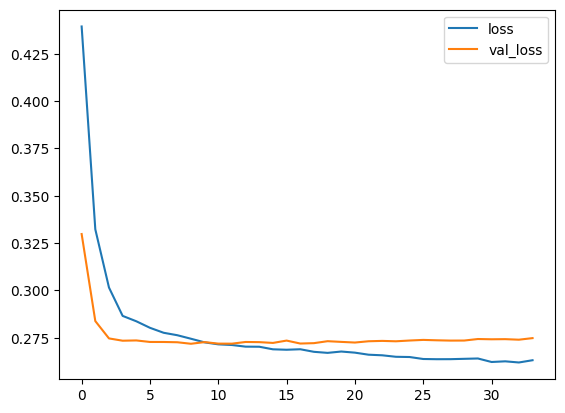

In [182]:
losses.plot()

In [183]:
from sklearn.metrics import classification_report,confusion_matrix

In [184]:
predictions = (model.predict(Xtest) > 0.5).astype("int32")

562/562 [==============================] - 1s 885us/step


In [185]:
print(classification_report(ytest,predictions))

              precision    recall  f1-score   support

           0       0.97      0.43      0.60      3681
           1       0.87      1.00      0.93     14286

    accuracy                           0.88     17967
   macro avg       0.92      0.72      0.77     17967
weighted avg       0.89      0.88      0.86     17967



In [186]:
df['loan_repaid'].value_counts()

1    71787
0    18044
Name: loan_repaid, dtype: int64

In [187]:
71787/len(df)

0.7991339292671795

In [188]:
confusion_matrix(ytest,predictions)

array([[ 1597,  2084],
       [   45, 14241]])